# AI 221: Machine Exercise 5

### 8x8 Handwritten Digits Visualization: Continued

In [73]:
from sklearn import datasets, manifold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA, PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

Load the `load_digits` data from sklearn.datasets.


In [2]:
digits = datasets.load_digits()
X, y = digits.data, digits.target
target_names = digits.target_names
print(X.shape, y.shape)

(1797, 64) (1797,)


### a.

**Normalize the X data using Standard Scaler. Then, project all the X data into 2 dimensions using 6 dimensionality reduction techniques:**

In [5]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

**The points should then be colored according to the digit labels, y**

In [68]:
def plot(X_result, title):  
    n_classes = len(target_names)
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.scatter(X_result[y == i, 0], X_result[y == i, 1], label=target_names[i],
                    alpha=0.8, lw=2)
    plt.legend(loc="best", shadow=False, bbox_to_anchor=(1, 1))
    plt.title(f"{title} of digits dataset")
    plt.show()


**1. Local Linear Embedding (n_neighbors = 200, random_state = 0)**

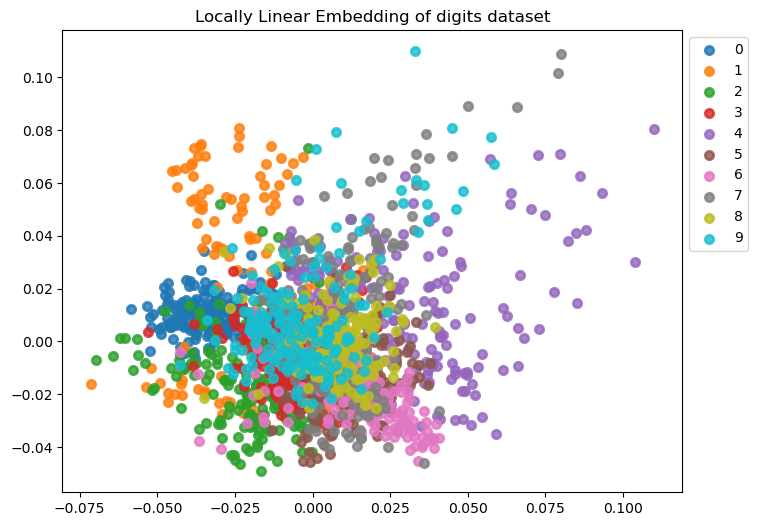

In [56]:
lle = manifold.LocallyLinearEmbedding(n_neighbors=200, random_state=0)
lle_result = lle.fit_transform(X_normalized)
plot(lle_result, "Locally Linear Embedding")

**2. t-SNE (perplexity = 50, random_state = 0)**

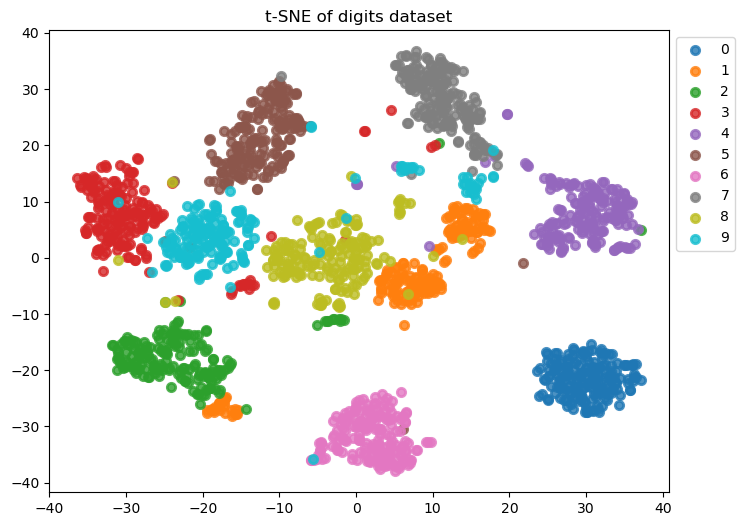

In [57]:
tsne = manifold.TSNE(perplexity=50, random_state=0)
tsne_result = tsne.fit_transform(X_normalized)
plot(tsne_result, "t-SNE")

**3. Isomap (n_neighbors = 200)**

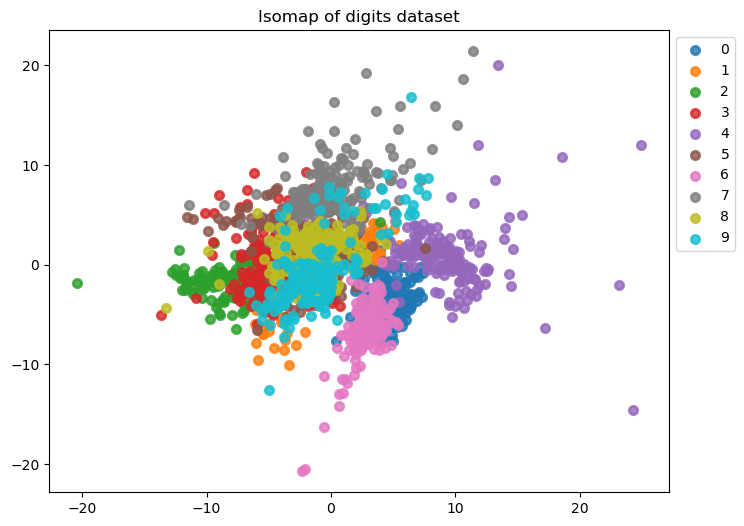

In [58]:
iso = manifold.Isomap(n_neighbors=200)
iso_result = iso.fit_transform(X_normalized)
plot(iso_result, "Isomap")

**4. Laplacian Eigenmap (n_neighbors = 200)**

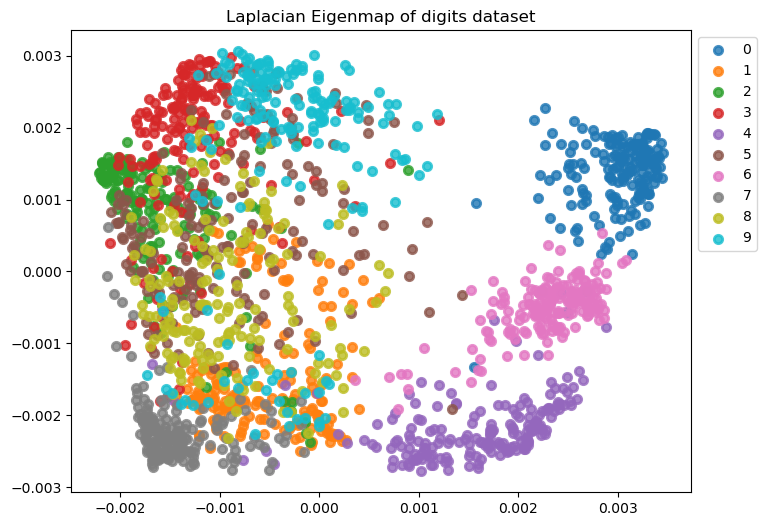

In [60]:
spec = manifold.SpectralEmbedding(n_neighbors=200)
spec_result = spec.fit_transform(X_normalized)
plot(spec_result, "Laplacian Eigenmap")

**5. Kernel PCA (kernel = ‘rbf’, gamma = 0.01)**

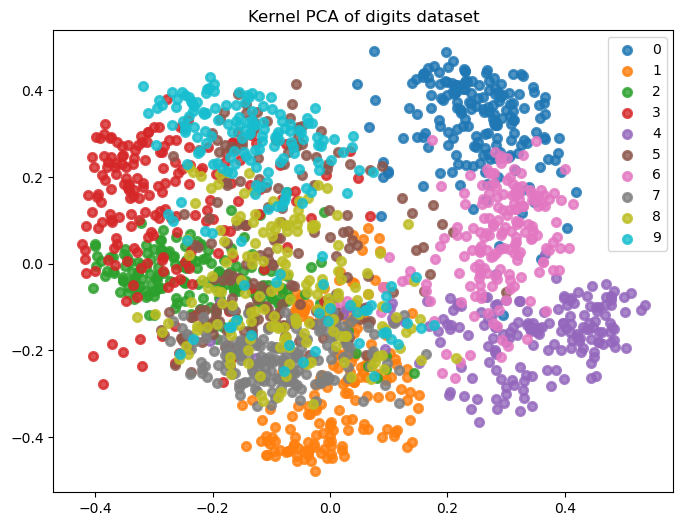

In [67]:
kpca = KernelPCA(kernel="rbf", gamma=0.01)
kpca_result = kpca.fit_transform(X_normalized)
plot(kpca_result, "Kernel PCA")

**6. PCA**

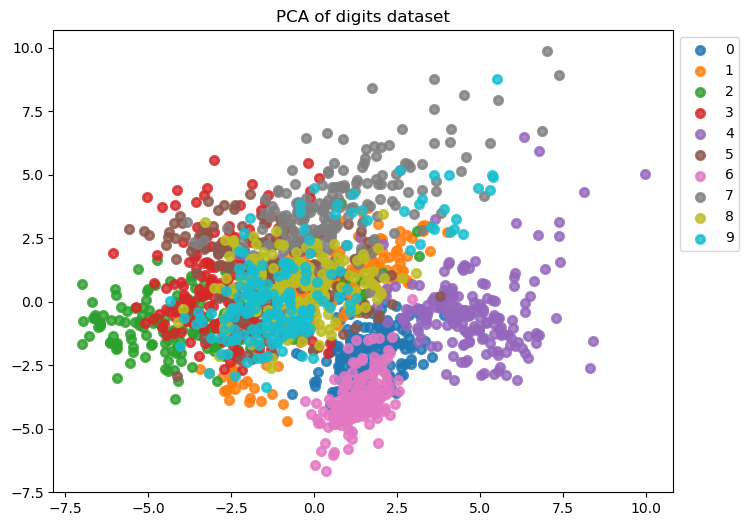

In [64]:
pca = PCA()
pca_result = pca.fit_transform(X_normalized)
plot(pca_result, "PCA")

**Which of the methods produced clear clusters of data points?**

Based on visual inspection, t-SNE produced the clearest clusted of data points

### b.

**Classification with and without dimensionality reduction. Split the data into 70% training and 30% testing, stratified according to class label.**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1257, 64) (1257,)
(540, 64) (540,)


**1. Make a pipeline using StandardScaler, Kernel PCA (kernel = ‘sigmoid’, 
n_components = 40), and SVC (default hyper-parameters). Fit the pipeline on the training 
set, then report the accuracy and F1-score on the test set.**

In [83]:
model_1 = make_pipeline(StandardScaler(),
                        KernelPCA(kernel="sigmoid", n_components=40),
                        SVC())
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
print("Model 1")
print(f"Accuracy: {accuracy_score(y_test, y_pred_1)}")
print(f"F1-score: {f1_score(y_test, y_pred_1, average='macro')}")

Model 1
Accuracy: 0.9981481481481481
F1-score: 0.9981479893680871


**2. Make a pipeline using StandardScaler and SVC (default hyper-parameters) 
alone. Fit the pipeline on the training set, then report the accuracy and F1-score on the 
test set.**

In [84]:
model_2 = make_pipeline(StandardScaler(),
                        SVC())
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
print("Model 2")
print(f"Accuracy: {accuracy_score(y_test, y_pred_2)}")
print(f"F1-score: {f1_score(y_test, y_pred_2, average='macro')}")

Model 2
Accuracy: 0.9814814814814815
F1-score: 0.9815583872644662


**Which of the two methods had a better test performance for classification? Why?**

Based on the accuracy and f1-score metrics, model 1 (with Kernel PCA step) had a better test performance for classification. The non-linear transformation introduced by the Kernel PCA is effective in capturing the underlying patterns in the digits dataset. This extra step projected the data into lower dimension with 40 principal components that maximizes the variance of the original, and made it easier for the SVM classifier to separate classes with better decision boundary, leading to improved classification performance.